In [24]:
# Importar librerías necesarias
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Cargar los datos
df = pd.read_csv('housing.csv')

# Eliminar registros con valores nulos
datos = df.dropna()
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)
# Concatenar al DF los dummies extraídos de la proximidad al océano
datos = pd.concat([datos, dummies], axis=1)
datos.drop('ocean_proximity', axis=1, inplace=True)  # Afectar el DF original

datos['room_ratio'] = datos['total_rooms'] / datos['total_bedrooms'] 
# Características de entrada
X = datos.drop('median_house_value', axis=1)  # axis=1 para eliminar la columna

# Etiqueta
y = datos['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Crear el modelo de Árbol de Decisión
modelo = DecisionTreeRegressor(max_depth=5)

# Entrenamiento
modelo.fit(X_train, y_train)

# Predicciones
predicciones = modelo.predict(X_test)

# Evaluación del modelo
print(f'Score de entrenamiento: {modelo.score(X_train, y_train)}')
print(f'Score de prueba: {modelo.score(X_test, y_test)}')

# porcentaje de precisión
print(f'Precisión: {r2_score(y_test, predicciones)}')

Score de entrenamiento: 0.6410163486077411
Score de prueba: 0.6286933471458718
Precisión: 0.6286933471458718


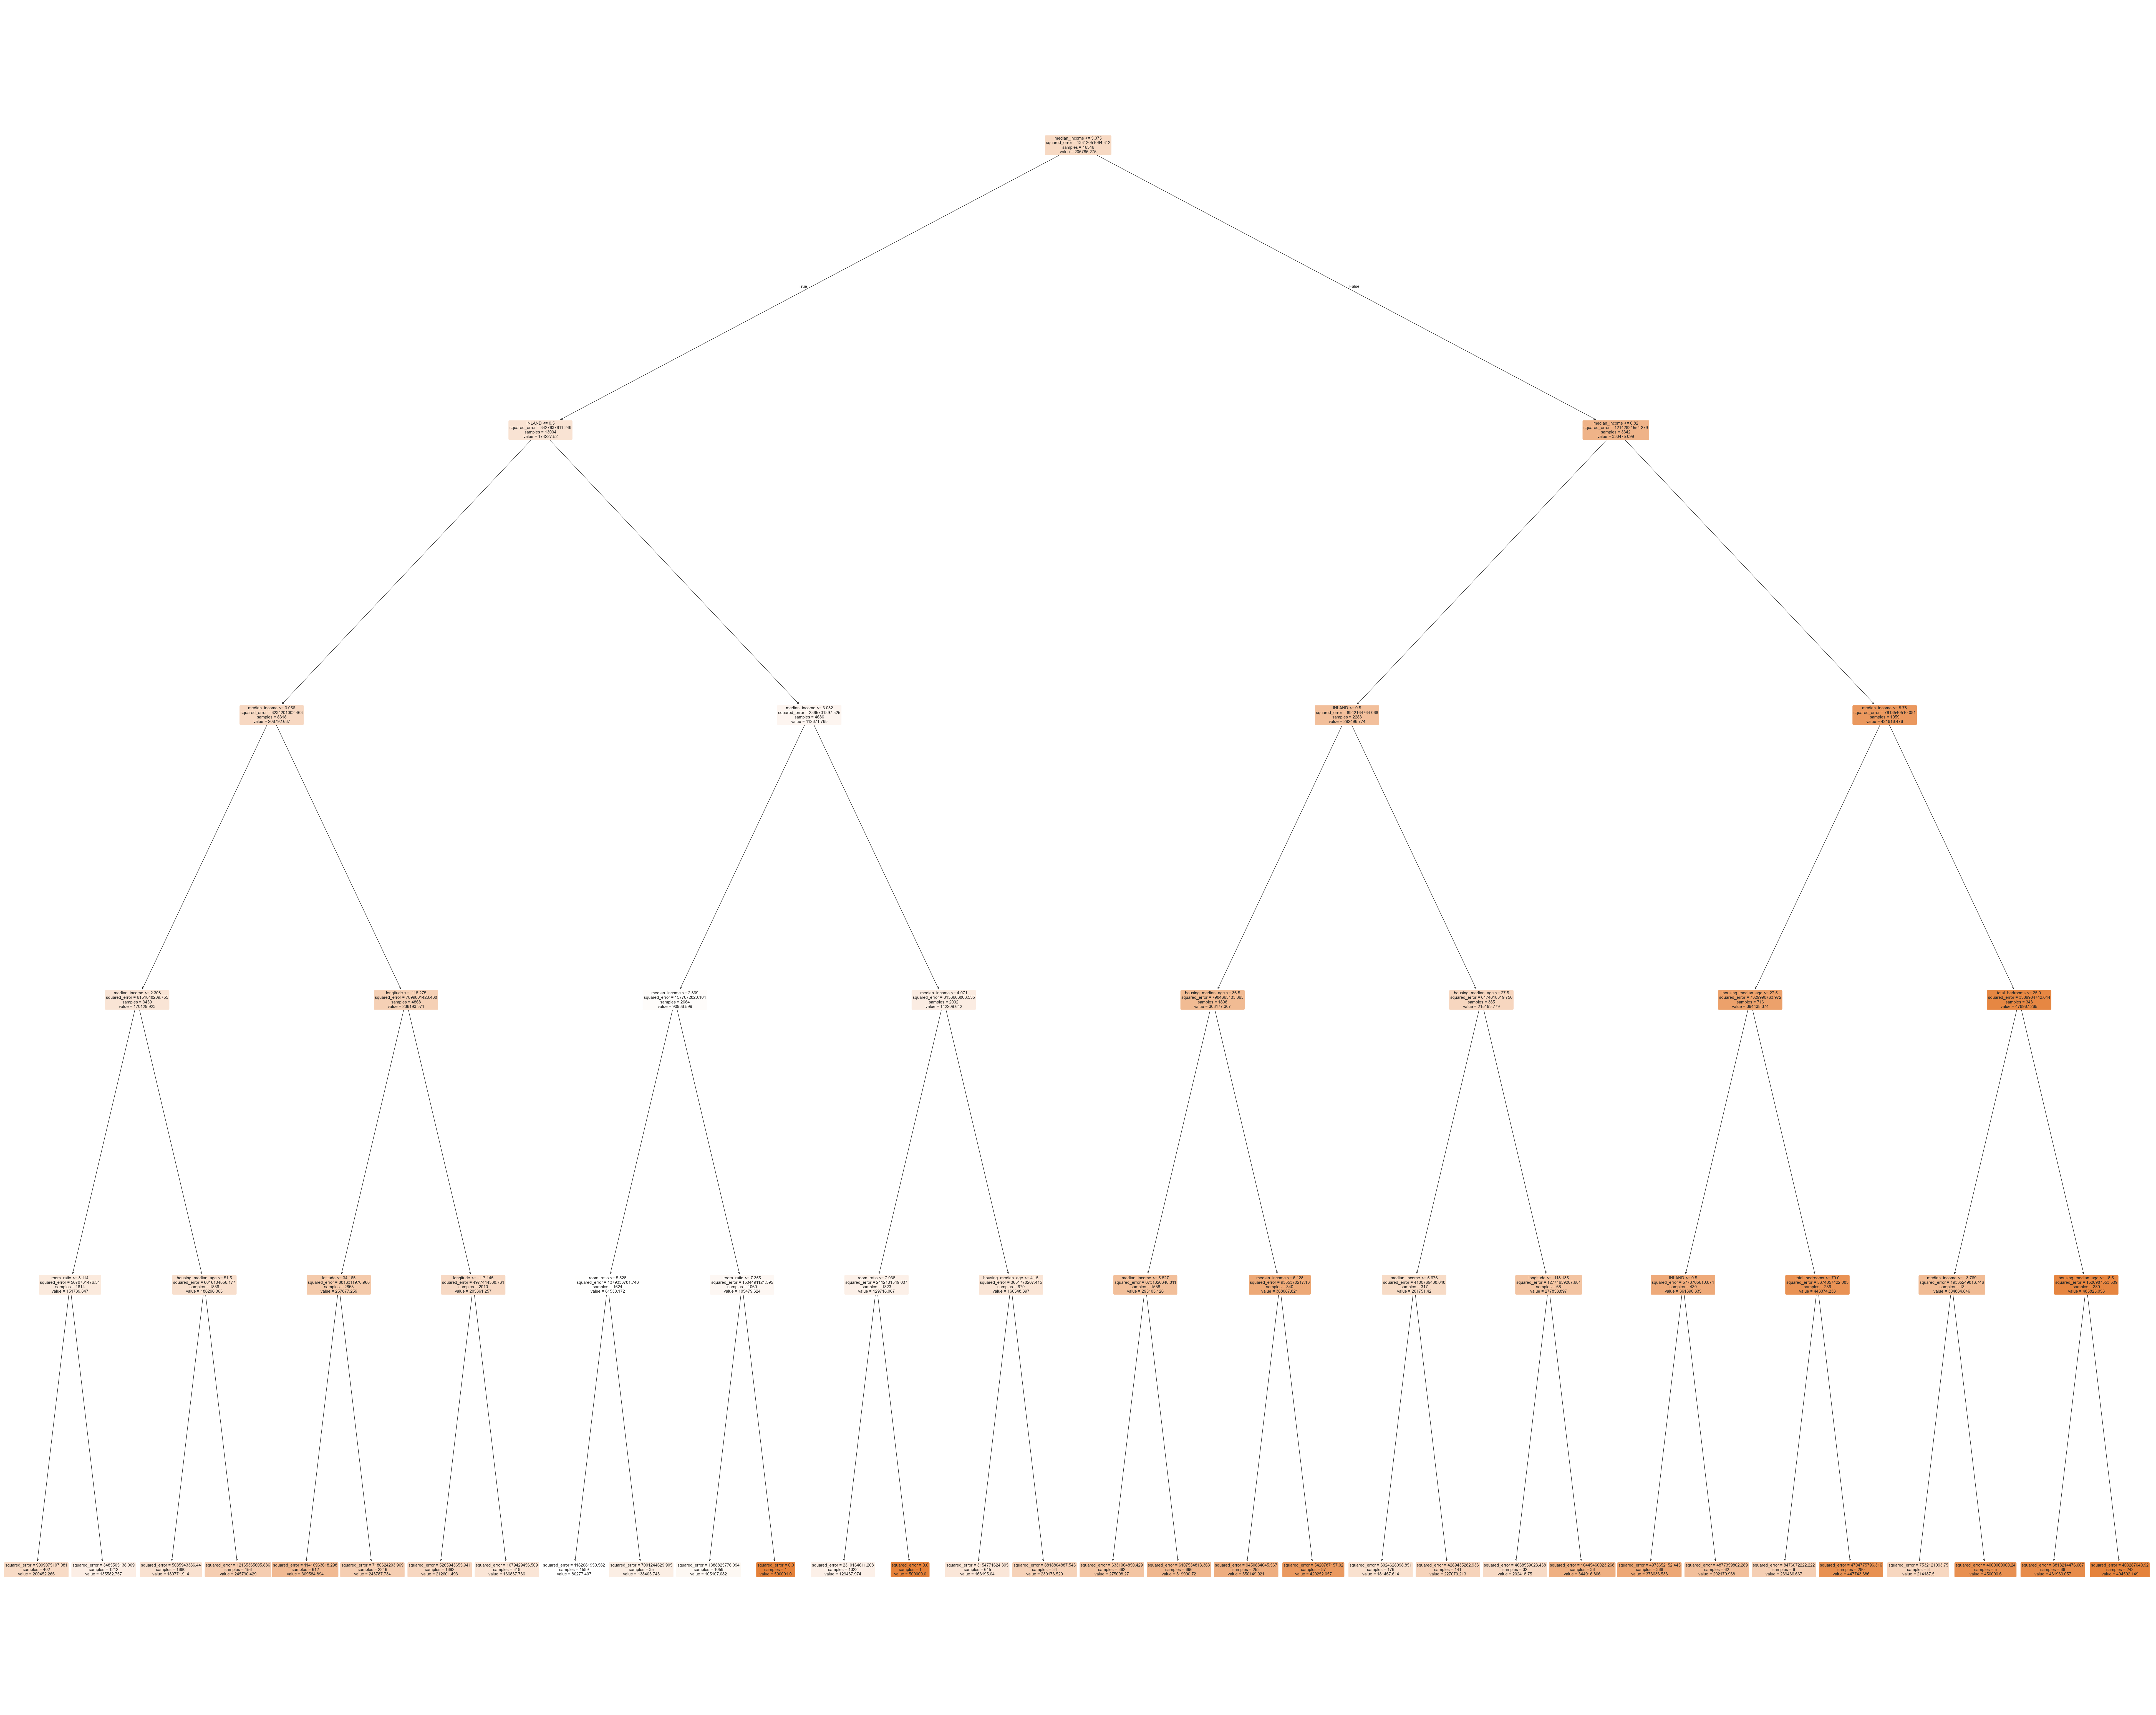

In [25]:
# Graficar el árbol de decisión
plt.figure(figsize=(100,80))
tree.plot_tree(modelo, filled=True, feature_names=X.columns, rounded=True)
plt.show()